# Install and load packages

Install the forecast package from CRAN. You only need to run this line if you are working on your local machine. 

In [ ]:
#install.packages('forecast', repos='http://cran.us.r-project.org')

Load the library of functions from the forecast package. You need to run this line each time you open this file.

In [1]:
library(forecast)

# Load and explore data

Before you load the data from the case, save the csv file into the same folder where this Jupyter notebook is saved.

In [2]:
baby.df <- read.csv("NICU_A.csv")

View the first six and the last six rows of your data.

In [4]:
head(baby.df)
tail(baby.df)

,Month,Year,Admits,ALOS
1,Jul,2007,44,NA
2,Aug,2007,42,NA
3,Sep,2007,43,NA
4,Oct,2007,47,NA
5,Nov,2007,37,NA
6,Dec,2007,48,NA


,Month,Year,Admits,ALOS
63,Sep,2012,39,28.4
64,Oct,2012,45,28.2
65,Nov,2012,41,34.4
66,Dec,2012,33,29.7
67,Jan,2013,33,25.2
68,Feb,2013,43,30.8


Create a time series out of the admits column. Plot this time series.

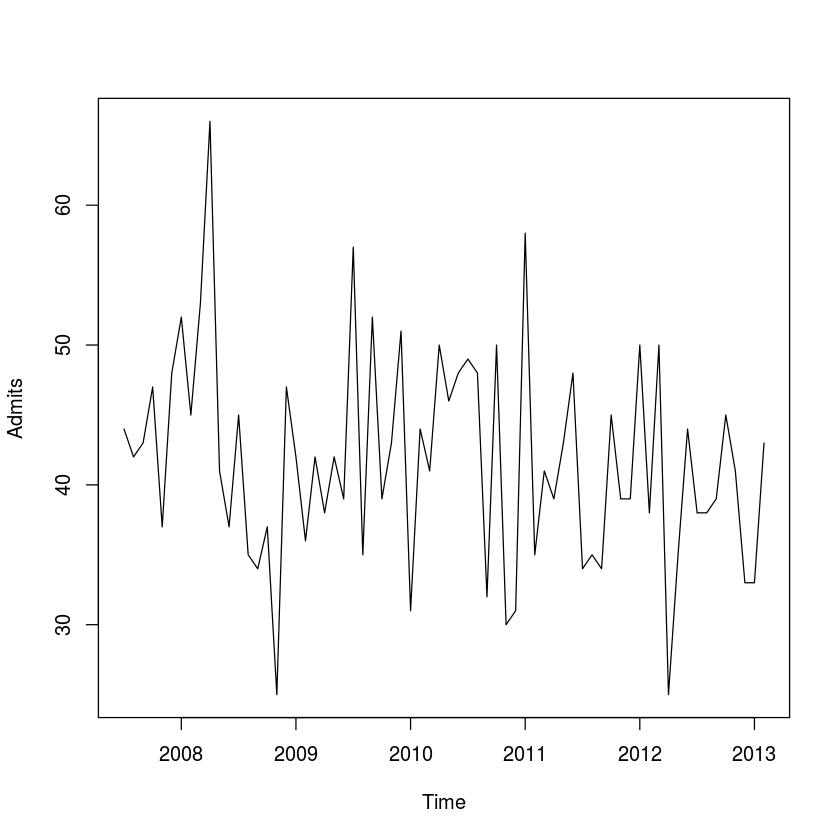

In [5]:
admits.ts <- ts(baby.df$Admits, start = c(2007, 7), end = c(2013, 2), freq = 12)
plot(admits.ts, ylab = "Admits")

# Fit models

Fit two exponential smoothing models using the ets function. ets is a function from the forecast package that fits exponential smoothing models. e stands for error, t stands for trend, and s stands for seasonality.

For Model 1, use the argument model = "ANN" in the ets function. This model is a simple exponential smoothing model.
For Model 2, use the argument model = "AAN" in the ets function. This model is Holt's linear trend model.

In [6]:
(admits.ets.1 <- ets(admits.ts, model = "ANN"))

ETS(A,N,N) 

Call:
 ets(y = admits.ts, model = "ANN") 

  Smoothing parameters:
    alpha = 1e-04 

  Initial states:
    l = 41.705 

  sigma:  7.5892

     AIC     AICc      BIC 
568.5610 568.9360 575.2195 

By putting parantheses at the beginning and end of a line of R, the assignment is made and the output is provided.  Without the paratheses, the assignment is made, but the output is not provided.

In [7]:
(admits.ets.2 <- ets(admits.ts, model = "AAN"))

ETS(A,A,N) 

Call:
 ets(y = admits.ts, model = "AAN") 

  Smoothing parameters:
    alpha = 0.0015 
    beta  = 0.0015 

  Initial states:
    l = 44.4491 
    b = -0.0753 

  sigma:  7.4434

     AIC     AICc      BIC 
569.9228 570.8905 581.0203 

Which model is better? Akaike's Information Criterion (AIC) is a measure of a model's goodness of fit.  The concept is similar to adjusted-R^2 used in regression models, which describes the model's fit and includes a penalty for the number of parameters. 

# Make predictions

Make 17-steps-ahead forecasts (which will get us to July 2014).

In [8]:
admits.ets.1.pred <- forecast(admits.ets.1, h = 17)
admits.ets.2.pred <- forecast(admits.ets.2, h = 17)

Plot the forecast cones side-by-side. The line "par(mfrow = c(1, 2))" creates a panel of plots where the plots are in 1 row and 2 columns.

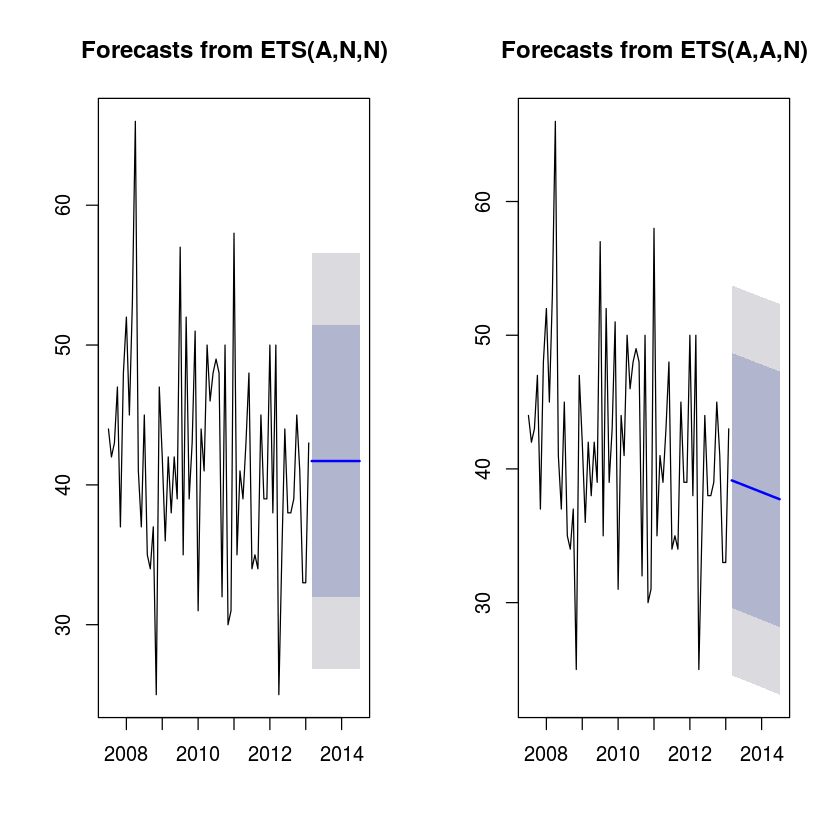

In [9]:
par(mfrow = c(1, 2))
plot(admits.ets.1.pred)
plot(admits.ets.2.pred)

Print the mean forecasts from each model for 17-months ahead. Which forecast is more plausible? 

In [10]:
admits.ets.1.pred$mean[17]
admits.ets.2.pred$mean[17]

[1] 41.70499

[1] 37.73699

Extend Code

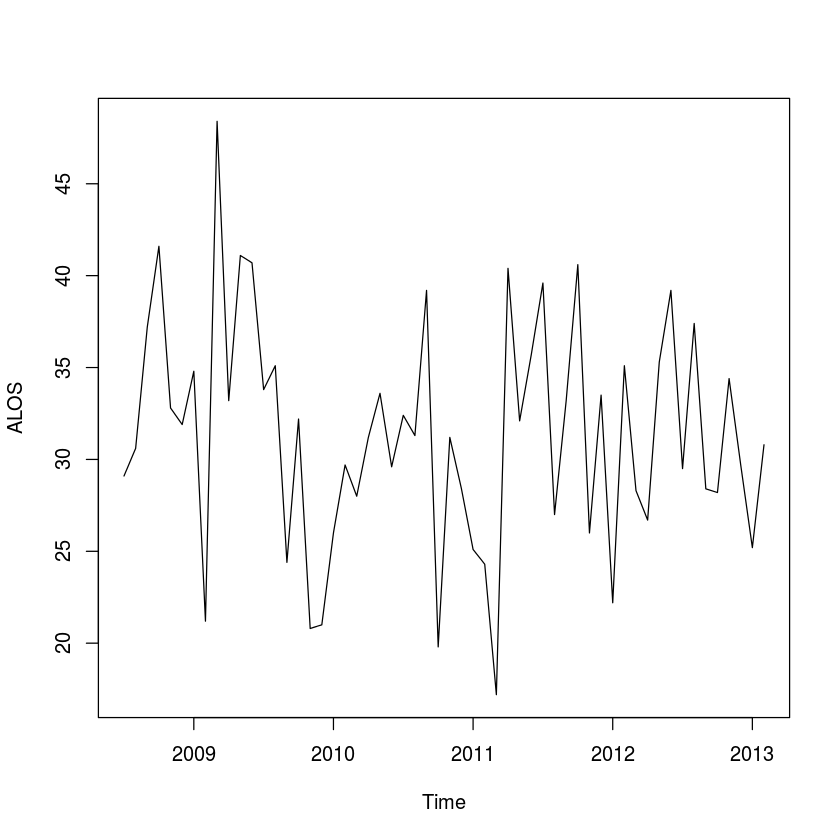

In [20]:
#Remove NA rows from baby.df
baby2.df <- tail(baby.df, -12)

#Create times series with ALOS and plot
alos.ts <- ts(baby2.df$ALOS, start = c(2008, 7), end = c(2013, 2), freq = 12)
plot(alos.ts, ylab = "ALOS")

ETS(A,N,N) 

Call:
 ets(y = alos.ts, model = "ANN") 

  Smoothing parameters:
    alpha = 1e-04 

  Initial states:
    l = 31.3463 

  sigma:  6.2628

     AIC     AICc      BIC 
436.8982 437.3597 442.9743 

ETS(A,A,N) 

Call:
 ets(y = alos.ts, model = "AAN") 

  Smoothing parameters:
    alpha = 1e-04 
    beta  = 1e-04 

  Initial states:
    l = 32.9714 
    b = -0.0551 

  sigma:  6.2199

     AIC     AICc      BIC 
440.1286 441.3286 450.2553 

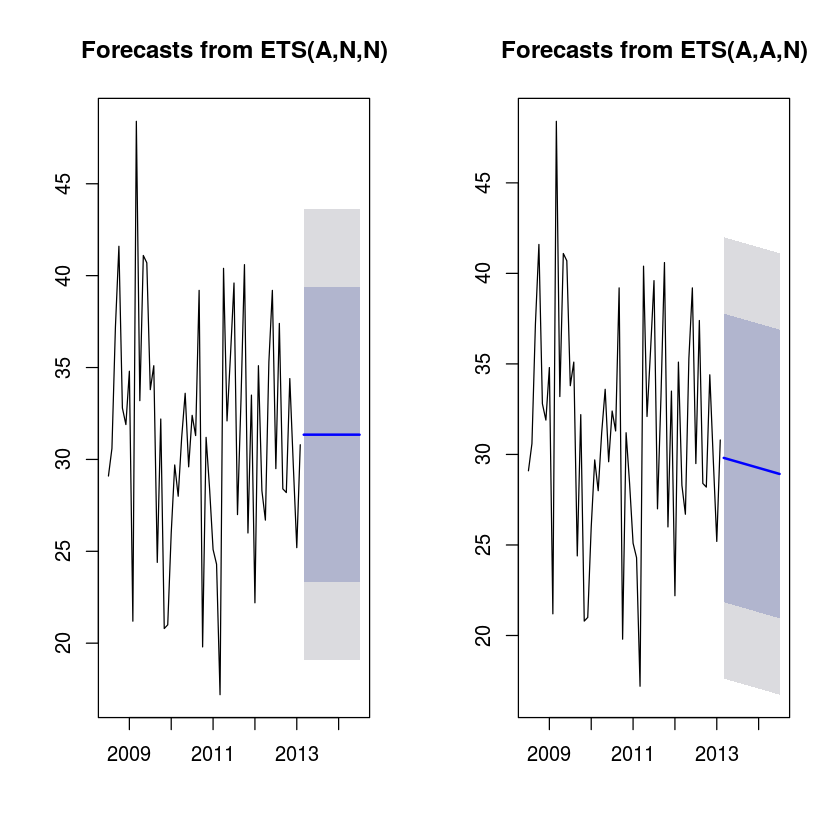

In [25]:
#Fit Models & check for goodness-of-fit #AIC
(alos.ets.1 <- ets(alos.ts, model = "ANN"))
(alos.ets.2 <- ets(alos.ts, model = "AAN"))


In [24]:
#Make 17-steps-ahead forecasts to get to July 2014
alos.ets.1.pred <- forecast(alos.ets.1, h = 17)
alos.ets.2.pred <- forecast(alos.ets.2, h = 17)

#Plot prediction plots
par(mfrow = c(1, 2))
plot(alos.ets.1.pred)
plot(alos.ets.2.pred)

In [26]:
#Print mean forecasts from each model
alos.ets.1.pred$mean[17]
alos.ets.2.pred$mean[17]

[1] 31.34632

[1] 28.92548

In [27]:
#Print mean of historical numbers
mean(baby2.df$ALOS)

[1] 31.34643